In [21]:
%run ~/Documents/PhD/j_model/Lissa.ipynb


def nucleus(E, t, diag=False):
    # Peak detection
    maxtab, mintab = peakdet(E, 0.001, x=t)
    
    # A fitting to the peak values to get the decay coefficient:
    result = gmodel.fit(E[:150], t=t[:150], decay=10, nan_policy='propagate')

    # Can you guess the residual?
    if 0.95 <= np.abs(E[-1]/mintab[0, 1]) <= 1.02:
        print('residual? :' + str(mintab[0, 1]))
        
    # Maxpeaks
    a = maxtab[0, :]  # Initial point
    
    if np.shape(maxtab) != (2, 2):  # If there are more points than a and i:
        b1 = maxtab[1, :]  # Second Peak
        i = maxtab[2, :]            
    elif np.shape(maxtab) == (2, 2):
        i = maxtab[1, :]
        b1 = i
        print('i point is the first one')     
    
    # Minpeaks
    b2 = mintab[0, :]  # (Technically) The lowest point
        

    # The initial bump is not detected if the points e & i are both > 0.32
    if b1[0] > 60:
        i = b1
        if i[1] < 0:
            i = maxtab[2, :]
        e = b2
        b1, b2, BR = np.nan, np.nan, np.nan
        GR1, GR2, PE2 = np.nan, np.nan, np.nan
    els





            
    if diag == True:
        print('Diag mode on')
        
        return maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o
    else:

        return result, OS, DR, TP

loading successful!


In [4]:
ls

IFERC/                   README.md                zet_ef/
LHD/                     S-alpha/
Lissa.ipynb              The Cake notebook.ipynb


In [53]:
data = pylab.loadtxt('IFERC/W7Xhms05/GAM/310.957_P/gamdiagions_act.dat')
data2 = pylab.loadtxt('IFERC/W7Xhms05/GAM/104.719/gamdiagions_act.dat')
data[:, 2]

array([0.      , 3.8725  , 7.7054  , ..., 0.018424, 0.018491, 0.018558])

In [61]:
E = (data[:,1]*(1/data[0, 1]))
e = (data[:,2]*(1/data[0, 1]))
t = data[:,0]
#t_f = (np.abs(t - mxtime)).argmin()
#E = E[:t_f]
#t = t[:t_f]

integ = []
decay = []
osrat = []
dcrat = []
pekti = []

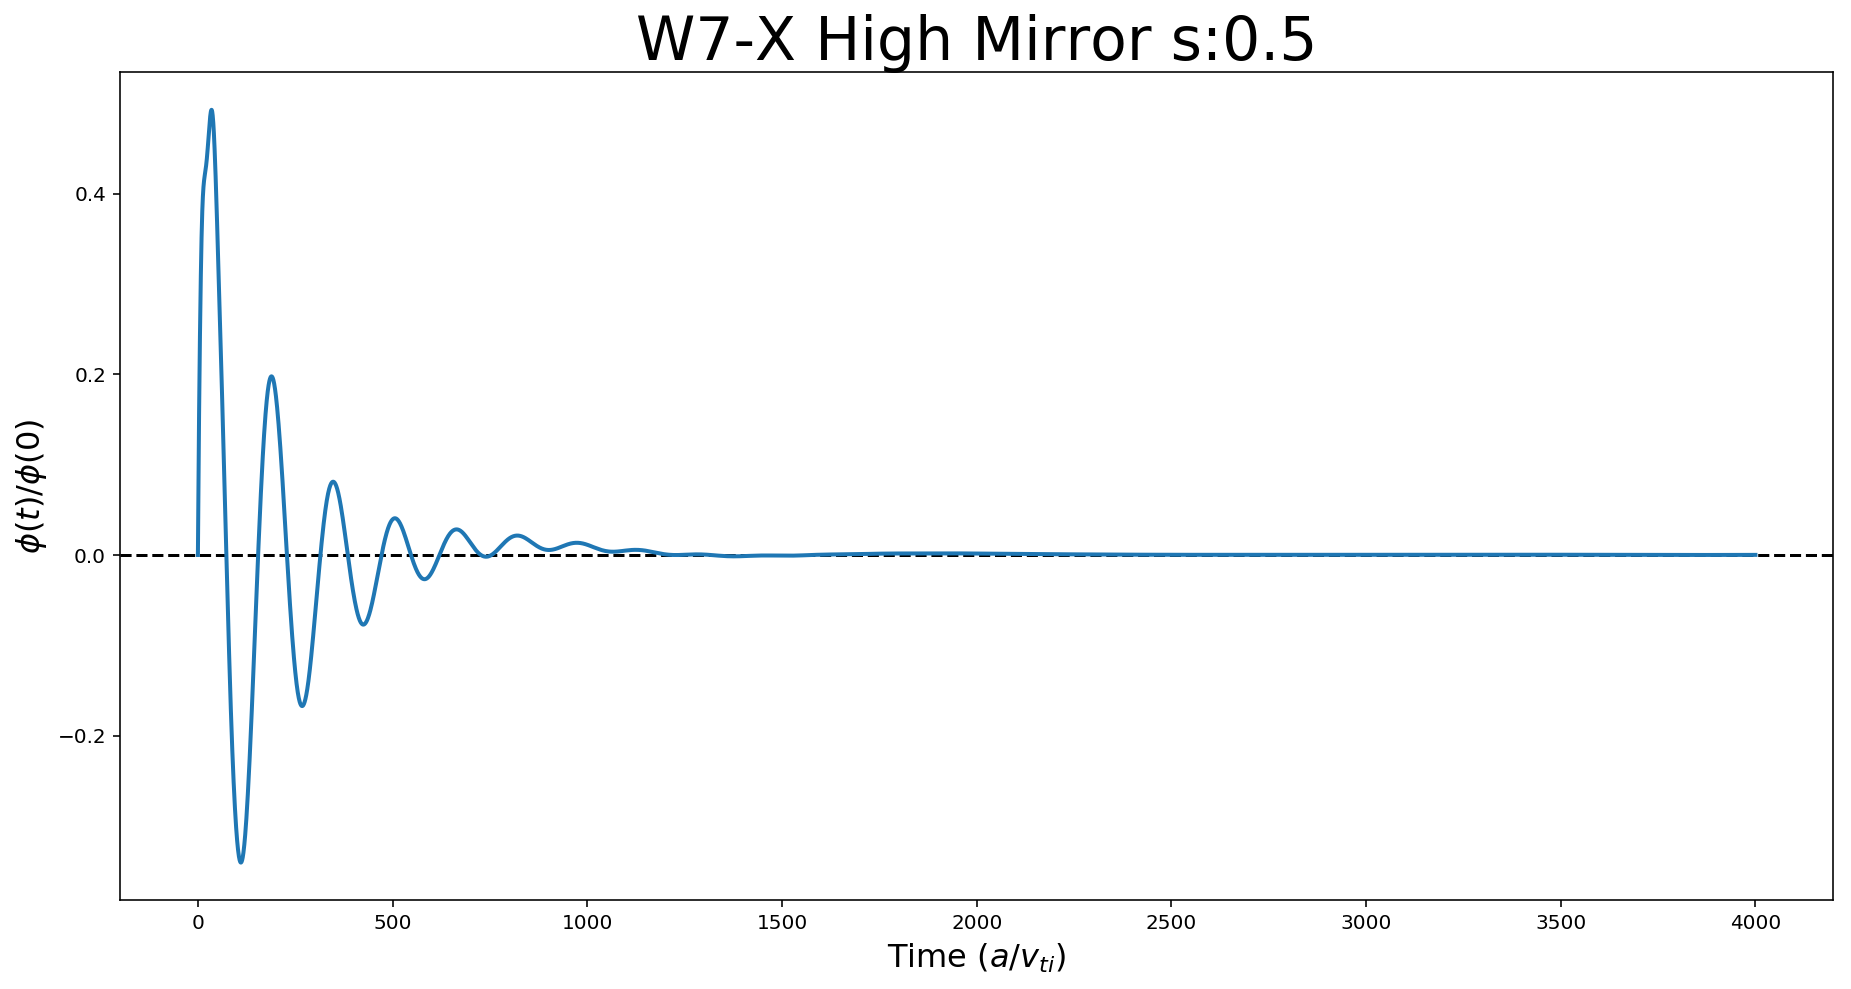

In [66]:
fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Mirror s:0.5', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')
#kx1 = 2*(3.1416)/310.957

Q = np.sqrt(E**2+e**2)
ax1.plot(t, e, linewidth=2, label=('$L_{x}$: 310.957'))

fig.tight_layout()
#plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200)    

integ.append(np.trapz(Q, t))


result, OS, DR, TP = nucleus(E, t, diag=False)   


decay.append(result.best_values.get('decay'))
osrat.append(OS)
dcrat.append(DR)
pekti.append(TP)

In [67]:
integ

[7.023210068357244, 13.650453548521323, 121.36439173809894]